# Import data and pre-processing

In [110]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt; plt.rcdefaults()

#import graphviz 

from treend import *
from reg_tree import *


In [4]:
df = pd.read_csv('../datasets/Automobile_data.csv')

In [5]:
df=df.replace('?',np.nan)

In [71]:
print(df)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

In [6]:
# Create numerical values of ordinal features
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)

In [7]:
# Create dummy variables for all categorical data (including ordinal)
df = pd.get_dummies(df, columns=["make", "fuel-type", "num-of-doors","fuel-system", "aspiration",  "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders"  ], prefix=["make", "fuel_type", "doors", "fuel_sys", "aspi",  "body", "drive", "eng_loc", "eng_type", "cylinders"], drop_first= True)
#df = pd.get_dummies(df, columns=["make", "fuel-type", "num-of-doors", "aspiration",  "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders"  ], prefix=["make", "fuel_type", "doors",  "aspi",  "body", "drive", "eng_loc", "eng_type", "cylinders" ])

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,eng_type_ohc,eng_type_ohcf,eng_type_ohcv,eng_type_rotor,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_12
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,1,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,...,1,0,0,0,0,1,0,0,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,...,1,0,0,0,0,0,1,0,0,0


In [74]:
# Impute the missing values with KNN imputer (4 nearest neighbours)
df_imputed4NN = df
imputer = KNNImputer(n_neighbors=4)
df_imputed4NN =pd.DataFrame(imputer.fit_transform(df_imputed4NN), index=df.index, columns=df.columns)
print(df_imputed4NN)

     symboling  normalized-losses  wheel-base  length  width  height  \
0          3.0             113.75        88.6   168.8   64.1    48.8   
1          3.0             131.75        88.6   168.8   64.1    48.8   
2          1.0             131.75        94.5   171.2   65.5    52.4   
3          2.0             164.00        99.8   176.6   66.2    54.3   
4          2.0             164.00        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
200       -1.0              95.00       109.1   188.8   68.9    55.5   
201       -1.0              95.00       109.1   188.8   68.8    55.5   
202       -1.0              95.00       109.1   188.8   68.9    55.5   
203       -1.0              95.00       109.1   188.8   68.9    55.5   
204       -1.0              95.00       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  eng_type_ohc  eng_type_ohcf  \
0         2548.0        130.0  3.47    2.68  ...      

In [75]:
#Check whether the NaN have been  filled
df_imputed4NN.isnull().values.any()


False

In [76]:
#Cell to check out different columns 
df_imputed4NN.iloc[:,35:66].describe()

,make_volkswagen,make_volvo,fuel_type_gas,doors_4.0,fuel_sys_2bbl,fuel_sys_4bbl,fuel_sys_idi,fuel_sys_mfi,fuel_sys_mpfi,fuel_sys_spdi,...,eng_type_ohc,eng_type_ohcf,eng_type_ohcv,eng_type_rotor,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.058537,0.053659,0.902439,0.556098,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,...,0.721951,0.073171,0.063415,0.019512,0.004878,0.775610,0.053659,0.117073,0.024390,0.004878
std,0.235330,0.225894,0.297446,0.498059,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,...,0.449134,0.261054,0.244304,0.138655,0.069843,0.418201,0.225894,0.322294,0.154635,0.069843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
list(df_imputed4NN.columns.values)

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel_type_gas',
 'doors_4.0',
 'fuel_sys_2bbl',
 'fuel_sys_4bbl',
 'fuel_sys_idi',
 'fuel_sys_mfi',
 'fuel_sys_mpfi',
 'fuel_sys_spdi',
 'fuel_sys_spfi',
 'aspi_turbo',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_fwd',
 'drive_rwd',
 'eng_loc_rear',
 'eng_type_dohcv',
 'eng_type_l',
 'eng_type_ohc',
 'eng_type_ohcf',
 'eng_type_ohcv',
 'eng_type_rotor',
 'cylinders_3',
 'cylinders_4',
 'cylinde

In [77]:
#Check whether the imputer kept the binary variable
print(df_imputed4NN["doors_4.0"].unique())

[0. 1.]


In [78]:
# Pre-processing, normalized losses and delete the instances without a price. 
df_delete= df
#df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]
df_delete.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,...,eng_type_ohc,eng_type_ohcf,eng_type_ohcv,eng_type_rotor,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_12
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,...,0.721393,0.074627,0.064677,0.019900,0.004975,0.781095,0.049751,0.119403,0.019900,0.004975
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,...,0.449433,0.263444,0.246568,0.140007,0.070535,0.414537,0.217973,0.325072,0.140007,0.070535
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df_delete=df_delete.drop(['normalized-losses'], axis=1)

In [80]:
df_delete.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,eng_type_ohc,eng_type_ohcf,eng_type_ohcv,eng_type_rotor,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_12
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,...,1,0,0,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,...,1,0,0,0,0,0,1,0,0,0


In [82]:
#impute with the median
num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    df_delete[col] = df_delete[col].replace('?', np.nan)
    df_delete[col] = pd.to_numeric(df_delete[col])
    df_delete[col].fillna(df_delete[col].median(), inplace=True)

In [84]:
# Impute the nearest neighbour for the door variables with missing values (median does not work here because of binary )

imputer = KNNImputer(n_neighbors=1)
df_delete =pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
print(df_delete)

     symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3.0        88.6   168.8   64.1    48.8       2548.0        130.0   
1          3.0        88.6   168.8   64.1    48.8       2548.0        130.0   
2          1.0        94.5   171.2   65.5    52.4       2823.0        152.0   
3          2.0        99.8   176.6   66.2    54.3       2337.0        109.0   
4          2.0        99.4   176.6   66.4    54.3       2824.0        136.0   
..         ...         ...     ...    ...     ...          ...          ...   
200       -1.0       109.1   188.8   68.9    55.5       2952.0        141.0   
201       -1.0       109.1   188.8   68.8    55.5       3049.0        141.0   
202       -1.0       109.1   188.8   68.9    55.5       3012.0        173.0   
203       -1.0       109.1   188.8   68.9    55.5       3217.0        145.0   
204       -1.0       109.1   188.8   68.9    55.5       3062.0        141.0   

     bore  stroke  compression-ratio  ...  eng_type

In [85]:
#Check whether the imputer kept the binary variable
print(df_imputed4NN["doors_4.0"].unique())

[0. 1.]


# Run different scenarios and compare

In [24]:
#Create X and y for X no deletion of values, imputed with 4nn

attrs = list(df_imputed4NN.columns.values)
feed = df_imputed4NN[attrs]
X = np.array(feed.drop('price',axis = 1))
y = np.array(feed['price'])

In [123]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])


#df = shuffle(df, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
# We split the data and apply the pre-processing

for train_index, test_index in kf.split(df):
      
        # Impute the missing values with KNN imputer (4 nearest neighbours), no deleted cells
        df_train_imputed4NN = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=4)
        df_train_imputed4NN =pd.DataFrame(imputer.fit_transform(df_train_imputed4NN), index=train_index, columns=df.columns)
        df_imputed4NN = pd.DataFrame(imputer.fit_transform(df), index=df.index, columns=df.columns)
        df_imputed4NN_test = df_imputed4NN.iloc[test_index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed4NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed4NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])

        #M5 regressor tree own
        reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=4,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = 4, max_depth=8).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=8, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth=8, min_samples_split=4, random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree regressor
        extra_tree_regressor = ExtraTreeRegressor(max_depth=8, random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


m5_r2 = np.mean(M5regressor_r2_model)
cons_r2 = np.mean(const_regressor_r2)                                           
cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
linear_r2 = np.mean(linear_regressor_r2)
random_r2 =np.mean(random_forest_regressor_r2)
extra_r2= np.mean(extra_tree_r2)
m5_MAE = np.mean(M5regressor_MAE_model)
cons_MAE = np.mean(const_regressor_MAE)                                           
cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
linear_MAE = np.mean(linear_regressor_MAE)
random_MAE =np.mean(random_forest_regressor_MAE)
extra_MAE = np.mean(extra_tree_MAE)
print("m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)

calc RMS of 184 points
calc RMS of 167 points
calc RMS of 104 points
calc RMS of 52 points
calc RMS of 41 points
calc RMS of 16 points
calc RMS of 13 points
calc RMS of 7 points
calc RMS of 5 points
calc RMS of 6 points
calc RMS of 25 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 20 points
calc RMS of 8 points
calc RMS of 6 points
calc RMS of 12 points
calc RMS of 8 points
calc RMS of 4 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 6 points
calc RMS of 52 points
calc RMS of 43 points
calc RMS of 40 points
calc RMS of 22 points
calc RMS of 11 points
calc RMS of 5 points
calc RMS of 6 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 18 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 13 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 7 points
calc RMS of 5 points
calc RMS of 63 points
calc RMS of 34 points
calc RMS of 4 points
calc RMS of 30 points
calc RMS of 27 points
calc RMS of 26 points
calc RMS of 13 points
calc 

calc RMS of 185 points
calc RMS of 165 points
calc RMS of 112 points
calc RMS of 72 points
calc RMS of 38 points
calc RMS of 15 points
calc RMS of 13 points
calc RMS of 11 points
calc RMS of 4 points
calc RMS of 7 points
calc RMS of 23 points
calc RMS of 4 points
calc RMS of 19 points
calc RMS of 9 points
calc RMS of 7 points
calc RMS of 10 points
calc RMS of 8 points
calc RMS of 34 points
calc RMS of 13 points
calc RMS of 8 points
calc RMS of 5 points
calc RMS of 5 points
calc RMS of 21 points
calc RMS of 18 points
calc RMS of 6 points
calc RMS of 4 points
calc RMS of 12 points
calc RMS of 9 points
calc RMS of 40 points
calc RMS of 38 points
calc RMS of 6 points
calc RMS of 32 points
calc RMS of 30 points
calc RMS of 28 points
calc RMS of 6 points
calc RMS of 22 points
calc RMS of 53 points
calc RMS of 51 points
calc RMS of 37 points
calc RMS of 21 points
calc RMS of 4 points
calc RMS of 17 points
calc RMS of 15 points
calc RMS of 7 points
calc RMS of 8 points
calc RMS of 16 points
ca

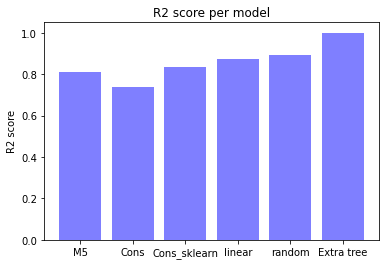

Text(0.5, 1.0, 'MAE score per model')

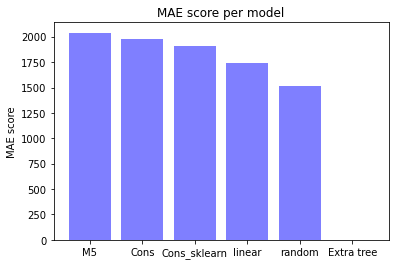

In [109]:
objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
r2Score = [m5_r2,cons_r2,cons_sklearn_r2,linear_r2,random_r2,1]

plt.bar(y_pos, r2_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('R2 score per model')
plt.show()

objects = ('M5', 'Cons', 'Cons_sklearn', 'linear', 'random', 'Extra tree')
y_pos = np.arange(len(objects))
MAE_score = [m5_MAE,cons_MAE,cons_sklearn_MAE,linear_MAE,random_MAE,1]

plt.bar(y_pos, MAE_score, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('MAE score')
plt.title('MAE score per model')

In [122]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])

# Pre-processing, normalized losses and delete the instances without a price. 
df_delete= df
df_delete['price'] = df_delete['price'].replace('?',np.nan)
df_delete['price'] = pd.to_numeric(df_delete['price'])
df_delete = df_delete[df_delete['price'].notna()]

df_delete=df_delete.drop(['normalized-losses'], axis=1)


kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df_delete)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
# We split the data and apply the pre-processing

for train_index, test_index in kf.split(df_delete):
      

        # Pre-processing, normalized losses and delete the instances without a price. 
        #impute with the median
        num_col = [ 'bore',  'stroke', 'horsepower', 'peak-rpm']
        for col in num_col:
            df_delete[col] = df_delete[col].replace('?', np.nan)
            df_delete[col] = pd.to_numeric(df_delete[col])
            df_delete_train= df_delete.iloc[train_index]
            df_delete[col].fillna(df_delete_train[col].median(), inplace=True)
            df_delete_train[col].fillna(df_delete_train[col].median(), inplace=True)
        
        imputer = KNNImputer(n_neighbors=1)
        df_delete_train = pd.DataFrame(imputer.fit_transform(df_delete_train), index=df_delete_train.index, columns=df_delete.columns)
        df_delete = pd.DataFrame(imputer.fit_transform(df_delete), index=df_delete.index, columns=df_delete.columns)
        df_delete_test = df_delete.iloc[test_index]
        
        attrs = list(df_delete.columns.values)
        feed = df_delete_train[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_delete_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])

        #M5 regressor tree own
        reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=4,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = 4, max_depth=8).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=8, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth=8, min_samples_split=4, random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree
        extra_tree_regressor = ExtraTreeRegressor(max_depth=8, random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


m5_r2 = np.mean(M5regressor_r2_model)
cons_r2 = np.mean(const_regressor_r2)                                           
cons_sklearn_r2 = np.mean(const_regressor_sklearn_r2_model)   
linear_r2 = np.mean(linear_regressor_r2)
random_r2 =np.mean(random_forest_regressor_r2)
extra_r2= np.mean(extra_tree_r2)
m5_MAE = np.mean(M5regressor_MAE_model)
cons_MAE = np.mean(const_regressor_MAE)                                           
cons_sklearn_MAE = np.mean(const_regressor_sklearn_MAE_model)   
linear_MAE = np.mean(linear_regressor_MAE)
random_MAE =np.mean(random_forest_regressor_MAE)
extra_MAE = np.mean(extra_tree_MAE)
print("m5 r2", np.mean(M5regressor_r2_model), "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)

calc RMS of 180 points
calc RMS of 161 points
calc RMS of 102 points
calc RMS of 75 points
calc RMS of 38 points
calc RMS of 15 points
calc RMS of 13 points
calc RMS of 7 points
calc RMS of 6 points
calc RMS of 6 points
calc RMS of 23 points
calc RMS of 20 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 9 points
calc RMS of 8 points
calc RMS of 37 points
calc RMS of 25 points
calc RMS of 23 points
calc RMS of 21 points
calc RMS of 14 points
calc RMS of 7 points
calc RMS of 12 points
calc RMS of 4 points
calc RMS of 8 points
calc RMS of 4 points
calc RMS of 4 points
calc RMS of 27 points
calc RMS of 24 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 19 points
calc RMS of 4 points
calc RMS of 15 points
calc RMS of 13 points
calc RMS of 4 points
calc RMS of 9 points
calc RMS of 59 points
calc RMS of 14 points
calc RMS of 7 points
calc RMS of 6 points
calc RMS of 7 points
calc RMS of 5 points
calc RMS of 45 points
calc RMS of 28 points
calc RMS of 9 points
calc R

calc RMS of 181 points
calc RMS of 110 points
calc RMS of 59 points
calc RMS of 36 points
calc RMS of 26 points
calc RMS of 13 points
calc RMS of 11 points
calc RMS of 7 points
calc RMS of 6 points
calc RMS of 4 points
calc RMS of 13 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 4 points
calc RMS of 5 points
calc RMS of 10 points
calc RMS of 7 points
calc RMS of 4 points
calc RMS of 23 points
calc RMS of 7 points
calc RMS of 5 points
calc RMS of 16 points
calc RMS of 13 points
calc RMS of 9 points
calc RMS of 7 points
calc RMS of 6 points
calc RMS of 4 points
calc RMS of 51 points
calc RMS of 29 points
calc RMS of 16 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 11 points
calc RMS of 8 points
calc RMS of 4 points
calc RMS of 4 points
calc RMS of 13 points
calc RMS of 12 points
calc RMS of 9 points
calc RMS of 4 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 22 points
calc RMS of 20 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of

In [144]:
# models on X_imputed
import warnings
warnings.filterwarnings('ignore')

#max_depth_range=[2,4,6,8, 10]
max_depth_range=[12]
#attrs = list(df.columns.values)
#feed = df[attrs]
#X = np.array(feed.drop('price',axis = 1))
#y = np.array(feed['price'])


#df = shuffle(df, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.split(df)
M5regressor_r2_model, const_regressor_r2, const_regressor_sklearn_r2_model, linear_regressor_r2, random_forest_regressor_r2, extra_tree_r2 = [], [], [], [], [], []
M5regressor_MAE_model, const_regressor_MAE, const_regressor_sklearn_MAE_model, linear_regressor_MAE, random_forest_regressor_MAE, extra_tree_MAE = [], [], [], [], [], []
# We split the data and apply the pre-processing

m5_r2 ,cons_r2 , cons_sklearn_r2, linear_r2,random_r2, extra_r2 = [],[],[],[],[],[]
m5_MAE, cons_MAE, cons_sklearn_MAE, linear_MAE, random_MAE, extra_MAE = [],[],[],[],[],[]

for max_depth in max_depth_range:
    
    for train_index, test_index in kf.split(df):
      
        # Impute the missing values with KNN imputer (4 nearest neighbours), no deleted cells
        df_train_imputed4NN = df.iloc[train_index]
        imputer = KNNImputer(n_neighbors=4)
        df_train_imputed4NN =pd.DataFrame(imputer.fit_transform(df_train_imputed4NN), index=train_index, columns=df.columns)
        df_imputed4NN = pd.DataFrame(imputer.fit_transform(df), index=df.index, columns=df.columns)
        df_imputed4NN_test = df_imputed4NN.iloc[test_index]
        
        attrs = list(df.columns.values)
        feed = df_train_imputed4NN[attrs]
        X_train = np.array(feed.drop('price',axis = 1))
        y_train = np.array(feed['price'])
        feed_test= df_imputed4NN_test[attrs]
        X_test = np.array(feed_test.drop('price',axis = 1))
        y_test = np.array(feed_test['price'])
        
        #M5 regressor tree own
        reg = M5regressor(smoothing=True, n_attr_leaf=4, max_depth=max_depth,k=20.0,pruning=True,optimize_models=True,incremental_fit=True).fit(X_train, y_train[:,None])
        M5regressor_r2_model.append(r2_score(y_test, reg.predict(X_test)))
        M5regressor_MAE_model.append(mean_absolute_error(y_test, reg.predict(X_test)))
        #Constant regressor tree own
        reg2 = Const_regressor(n_attr_leaf = 4, max_depth=max_depth).fit(X_train, y_train[:,None])
        const_regressor_r2.append(r2_score(y_test, reg2.predict(X_test)))
        const_regressor_MAE.append(mean_absolute_error(y_test, reg2.predict(X_test)))
        #Constant regressor tree SKlearn
        const_regressor_sklearn = tree.DecisionTreeRegressor(min_samples_leaf=4, max_depth=max_depth, random_state=42).fit(X_train, y_train)
        const_regressor_sklearn_r2_model.append(r2_score(y_test, const_regressor_sklearn.predict(X_test)))
        const_regressor_sklearn_MAE_model.append(mean_absolute_error(y_test, const_regressor_sklearn.predict(X_test)))
        #Linear regression sklearn
        linear_regressor = LinearRegression().fit(X_train, y_train)
        linear_regressor_r2.append(r2_score(y_test, linear_regressor.predict(X_test)))
        linear_regressor_MAE.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
        # Random forrest regressor
        random_forest_regressor = RandomForestRegressor(max_depth = max_depth, min_samples_split=4, random_state=42).fit(X_train, y_train)
        random_forest_regressor_r2.append(r2_score(y_test, random_forest_regressor.predict(X_test)))
        random_forest_regressor_MAE.append(mean_absolute_error(y_test, random_forest_regressor.predict(X_test)))
        #Extra tree
        extra_tree_regressor = ExtraTreeRegressor(max_depth=max_depth, random_state=42).fit(X_train, y_train)
        extra_tree_r2.append(r2_score(y_test, extra_tree_regressor .predict(X_test)))
        extra_tree_MAE.append(mean_absolute_error(y_test, extra_tree_regressor .predict(X_test)))


    m5_r2.append(np.mean(M5regressor_r2_model))
    cons_r2.append(np.mean(const_regressor_r2))                                           
    cons_sklearn_r2.append(np.mean(const_regressor_sklearn_r2_model))   
    linear_r2.append(np.mean(linear_regressor_r2))
    random_r2.append(np.mean(random_forest_regressor_r2))
    extra_r2.append(np.mean(extra_tree_r2))
    m5_MAE.append(np.mean(M5regressor_MAE_model))
    cons_MAE.append(np.mean(const_regressor_MAE))                                           
    cons_sklearn_MAE.append(np.mean(const_regressor_sklearn_MAE_model))   
    linear_MAE.append(np.mean(linear_regressor_MAE))
    random_MAE.append(np.mean(random_forest_regressor_MAE))
    extra_MAE.append(np.mean(extra_tree_MAE))
print("m5 r2", m5_r2, "MAE", m5_MAE )
print("cons r2",cons_r2, "MAE", cons_MAE  )
print("cons_sklearn r2", cons_sklearn_r2, "MAE", cons_sklearn_MAE) 
print("linear r2", linear_r2, "MAE", linear_MAE)
print("random r2", random_r2, "MAE", random_MAE)
print("extra r2", extra_r2, "MAE", extra_MAE)

calc RMS of 184 points
calc RMS of 167 points
calc RMS of 104 points
calc RMS of 52 points
calc RMS of 41 points
calc RMS of 16 points
calc RMS of 13 points
calc RMS of 7 points
calc RMS of 5 points
calc RMS of 6 points
calc RMS of 25 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 20 points
calc RMS of 8 points
calc RMS of 6 points
calc RMS of 5 points
calc RMS of 5 points
calc RMS of 5 points
calc RMS of 5 points
calc RMS of 12 points
calc RMS of 8 points
calc RMS of 4 points
calc RMS of 4 points
calc RMS of 4 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 6 points
calc RMS of 52 points
calc RMS of 43 points
calc RMS of 40 points
calc RMS of 22 points
calc RMS of 11 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 6 points
calc RMS of 4 points
calc RMS of 11 points
calc RMS of 9 points
calc RMS of 7 points
calc RMS of 4 points
calc RMS of 18 points
calc RMS of 5 points
calc RMS of 4 points
calc RMS of 13 points
calc RMS of 11 points
calc RMS of

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

([<matplotlib.axis.XTick at 0x2064ba0db50>,
 [Text(0, 0, '2'), Text(1, 0, '4'), Text(2, 0, '6'), Text(3, 0, '8')])

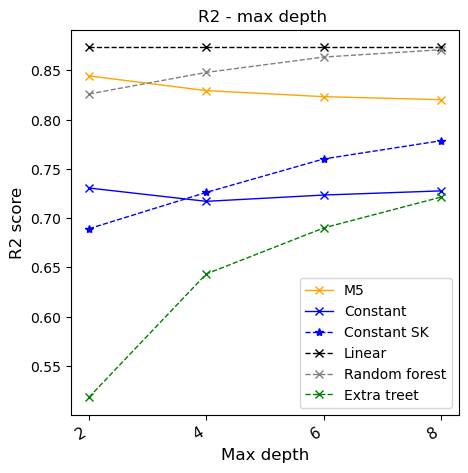

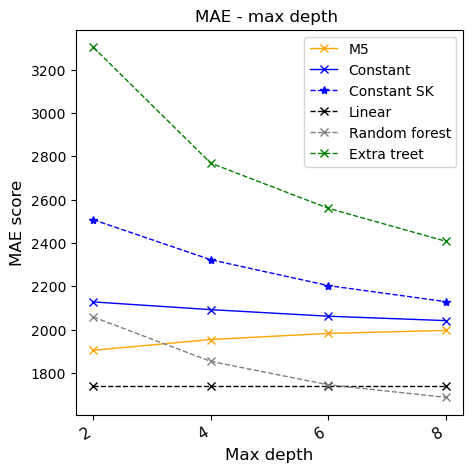

In [142]:
#Graph perceptron hold out
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_r2 , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, cons_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 - max depth ",fontsize=12)
plt.ylabel("R2 score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

#Graph perceptron hold out
vals      = np.arange(len(max_depth_range))
plt.figure(figsize=(5,5))
plt.plot(vals, m5_MAE , color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, cons_MAE ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, cons_sklearn_MAE, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_MAE,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_MAE,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_MAE,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("MAE - max depth ",fontsize=12)
plt.ylabel("MAE score",fontsize=12)
plt.xlabel("Max depth",fontsize=12)
labels =max_depth_range
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./R2_max_depth_range.pdf")

In [108]:
print(y_test.shape)
print(M5regressor_r2_model)
reg.predict(X_test)

(21,)
[]


array([20752.9955738 , 17557.73843986,  3109.58404254,  8438.89875268,
       10360.50392354,  5787.54630972,  7237.40893634, 12306.20708281,
        9476.39499129, 18750.33817903, 21833.39288217,  9814.36853412,
        6176.48579793,  6042.71941497,  6115.49182073, 10742.48666679,
        5699.37598735, 21617.82606714, 10741.77729258,  7328.30441775,
       36720.69001783])

In [38]:
#regression tree from sklearn
Const_regressor_sklearn = tree.DecisionTreeRegressor(random_state=42).fit(X, y)
Const_regressor_sklearn_r2 = cross_val_score(Const_regressor_sklearn, X,y[:,None], cv=5, scoring='r2')
print(Const_regressor_sklearn_r2)

[0.92709908 0.75904275 0.86117882 0.91970257 0.86637896]


In [51]:
#Linear regression sklearn
linear_regression = LinearRegression().fit(X, y)
linear_regressor_r2 = cross_val_score(linear_regression, X,y[:,None], cv=5, scoring='r2')
print(linear_regressor_r2)

[0.89795103 0.63877231 0.83909959 0.6909876  0.75264269]


In [54]:
# Random forrest regressor
random_forest = RandomForestRegressor(max_depth=2, random_state=42).fit(X, y)
random_forest_r2 = cross_val_score(random_forrest, X,y[:,None], cv=5, scoring='r2')
print(random_forest_r2)

[0.90615141 0.6219652  0.89020851 0.81957408 0.87024365]


In [60]:
extra_tree = ExtraTreeRegressor(random_state=0).fit(X, y)
extra_tree_r2 = cross_val_score(extra_tree, X,y[:,None], cv=5, scoring='r2')
print(extra_tree_r2)

[0.82735679 0.7543453  0.77747492 0.7593696  0.70248373]


([<matplotlib.axis.XTick at 0x256bb631eb0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

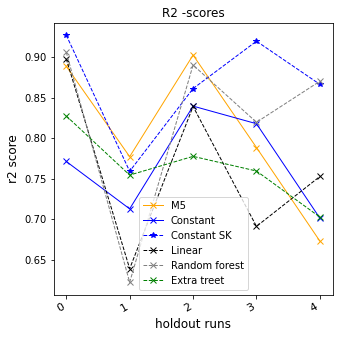

In [61]:
#Graph perceptron hold out
vals      = np.arange(5)
plt.figure(figsize=(5,5))
plt.plot(vals, M5regressor_r2,color="orange",marker="x", linewidth=1,label="M5")
plt.plot(vals, Const_regressor_r2 ,color="blue",marker="x", linewidth=1,label="Constant")
plt.plot(vals, Const_regressor_sklearn_r2, "--" ,color="blue",marker="*", linewidth=1,label="Constant SK")
plt.plot(vals, linear_regressor_r2,"--",color="black",marker="x", linewidth=1,label="Linear")
plt.plot(vals, random_forest_r2,"--",color="grey",marker="x", linewidth=1,label="Random forest")
plt.plot(vals, extra_tree_r2,"--",color="green",marker="x", linewidth=1,label="Extra treet")
plt.legend(loc="best")
plt.title("R2 -scores",fontsize=12)
plt.ylabel("r2 score",fontsize=12)
plt.xlabel("holdout runs",fontsize=12)
labels =np.arange(5)
plt.xticks(vals, labels,rotation=30,fontsize=11, ha="right")
#plt.savefig("./perc_scaling_vect_selection_HO.pdf")